# Salary Prediction 

In [132]:
'''This script loads, explores, and visualizes the salary prediction datasets'''
   
    
__author__ = 'Seema Mishra'
__email__ = 'seema.mishra.phd'
#__website__ = 'www.datasciencedreamjob.com'

#__copyright__ = 'Copyright 2018, Data Science Dream Job LLC'

In [1]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# visullizong missing vlaues in data set 
#import missingno as msno 

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#setting display options
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 500)
np.set_printoptions(linewidth =400)

# ignore warningsb
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn


from platform import python_version

print(python_version())




### helper functions for data visulization

In [164]:
#Visualization
# For categorical variable
def plot_categories(df, col):
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='bold',
    fontsize='small')
    plt.yticks(fontweight='bold',
    fontsize='small')
    grouped = df.groupby(col)['salary'].mean()\
    .sort_values()
    sns.boxplot(x = col, y = 'salary', data=df, order=grouped.index)

def plot_numerical(df, col):
    fig = plt.gcf()
    fig.set_size_inches(8, 5)
    grouped = df.groupby(col)['salary'].mean()\
    .sort_values()
    std = df.groupby(col)['salary'].std()
    grouped.plot()
    plt.xticks(rotation=45)
    plt.ylabel('Salary')


# For numerical variable
def plot_distribution( df , var , target , **kwargs ):
    
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
 
 #Plot corelation
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
 


# Total % of missing vlaues
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])


# Count categorical feature instances and %
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

### Load data

In [3]:
# Read in files and print the information
train_feature_df = pd.read_csv('data/train_features.csv')
train_target_df = pd.read_csv('data/train_salaries.csv')
test_feature_df = pd.read_csv('data/test_features.csv')

### Examine the data

In [4]:
train_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_target_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
test_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [7]:
test_feature_df.shape

(1000000, 8)

### use .info to see and length and datatype

In [8]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [10]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


### Check for shape of the data

In [11]:
print("shape of train set:", train_feature_df.shape)
print("shape of target set:", train_target_df.shape)
print("shape of test set:", test_feature_df.shape)

shape of train set: (1000000, 8)
shape of target set: (1000000, 2)
shape of test set: (1000000, 8)


### Check for duplicates

In [12]:
print("Number od duplicates in train features:", train_feature_df.duplicated().sum())
print("Number od duplicates in target features:", train_target_df.duplicated().sum())
print("Number od duplicates in test features:", test_feature_df.duplicated().sum())

Number od duplicates in train features: 0
Number od duplicates in target features: 0
Number od duplicates in test features: 0


### Indentifying numerical and categorical variables

In [13]:
list(train_feature_df.columns)

['jobId',
 'companyId',
 'jobType',
 'degree',
 'major',
 'industry',
 'yearsExperience',
 'milesFromMetropolis']

In [14]:
#Numerical 
numeric_cols = ['yearsExperience', 'milesFromMetropolis']

#Categorial
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

### Numerical and Castegorical data summarization

In [15]:
train_feature_df.describe(include = [np.number]) # for numerical

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [16]:
train_feature_df.describe(include = ['O'])  # for categorical

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685238963,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### Merge features and targets into single df (optional: delete original dfs)

In [17]:
train_df = pd.merge(train_feature_df, train_target_df, on = 'jobId')

In [18]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [19]:
del train_feature_df
del train_target_df

## Data Exploration 


###  Plot salary variable

Text(0.5, 1.0, 'Distribution Plot')

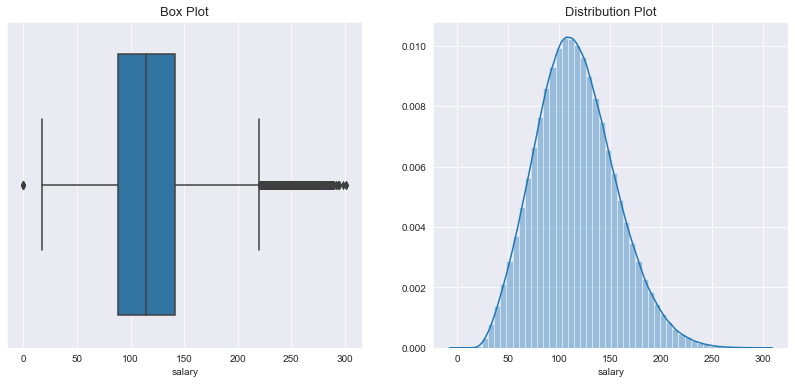

In [20]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(14,6),ncols=2)
ax1 = sns.boxplot(train_df.salary, ax = ax[0]);
ax2 = sns.distplot(train_df.salary, ax = ax[1]);
ax1.set_title("Box Plot", fontsize = 13)
ax2.set_title('Distribution Plot',  fontsize = 13)

**Summary**
***
- It looks like ...
    - distribution of salary feature follows a normal(Guaussian)distribution.
    - there seems to be an outlier after salary range around 220K and 0 also is a outlier.
    

### use IQR rule to identify potential outlier

In [21]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bound of suspected outliers are {} and {}.' .format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bound of suspected outliers are 220.5 and 8.5.


### Let's examine outliers in details

In [22]:
# Find all records below lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


**Summary**
***
- It looks like ...
    - It make no sense for job type manager having doctoral degree or Vice President has salary $0.
    - It seems the data is missing or incorrectly recorded. 

In [23]:
# Find all records above upper  bound
train_df.loc[train_df.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

**Summary**
***

  - salary for job type CEO, CFO, Vice President manager and for senior seems to be reasonale to have greater than $220
  - Job type Junior role and salary about $220K seems to have corrupt data but needs to be investigated further. 
    
    Lets find out the more details of record who has jobtype as a Junior and high salary.

In [24]:
train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


**Summary**
***
- It looks like ...
    - The high salary potential outlier seems to be legitimate.
    - Idustires that are well known for high salaries(oil, finance). 
    

In [25]:
# Remove data with salary for now
train_df = train_df[train_df.salary > 8.5]

### Data Visulization 

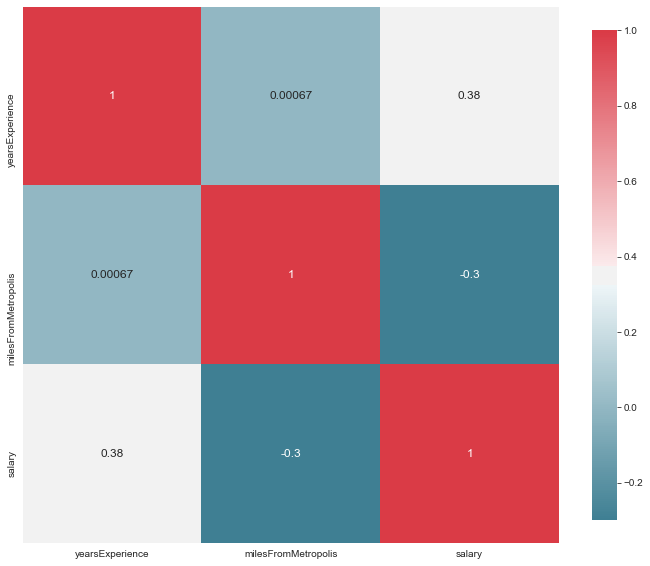

In [26]:
plot_correlation_map(train_df)

In [27]:
train_df.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


In [28]:
train_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

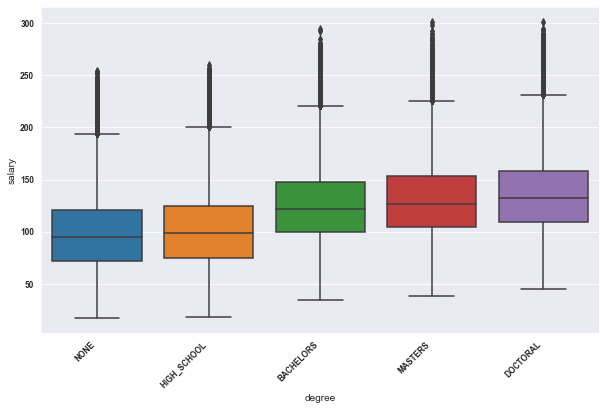

In [165]:
plot_categories(train_df,'degree')

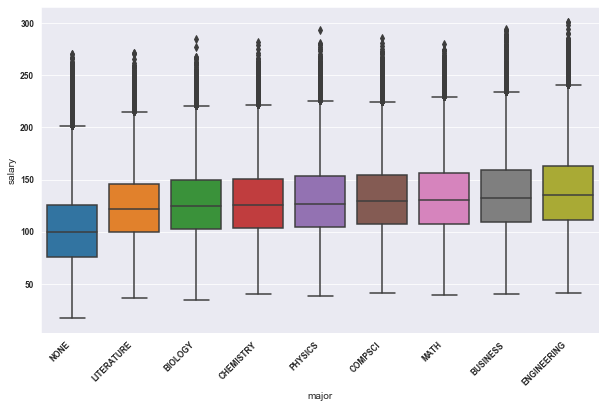

In [166]:
plot_categories(train_df,'major')

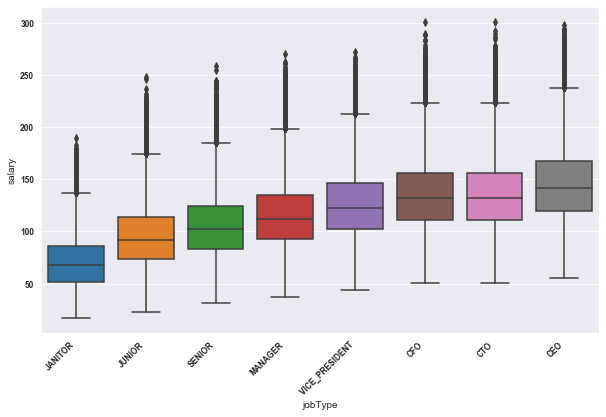

In [167]:
plot_categories(train_df,'jobType')

**Summary**
***
- We can see 
    - Higher the position of employee higher would be the salary.
      

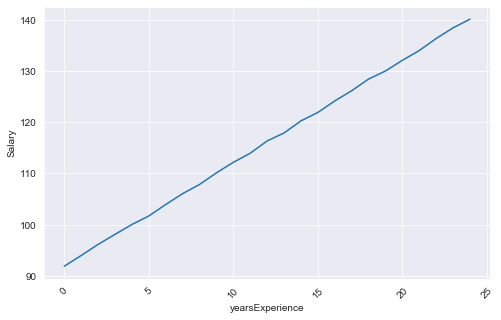

In [173]:
plot_numerical(train_df, 'yearsExperience')

**Summary**
***
- It clearly explain 
    - salary commensurate with experience. More the number of year of experience higher would be the salary.
    - Graph also exbhit the strong positive correlation between number of experience and salary. 

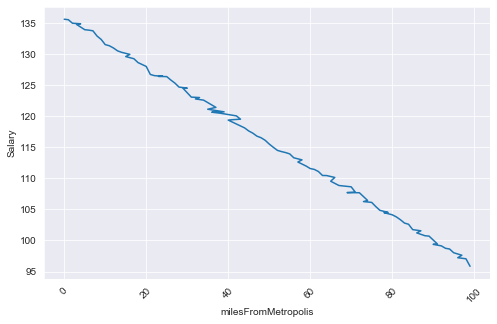

In [169]:
plot_numerical(train_df, 'milesFromMetropolis')

**Summary**
***

- Generally places far from metropolis have relatively low average salaries, which might be reson for financial benefits of cheaper housing, groceries, and other expenses.

- It also exhibit the the salary is negativiely correlated with milesFromMetropolis. 



## Data Quality Analysis


### Count missing data

In [175]:
missing_percentage(train_df)

,Total,Percent
salary,0,0.0
milesFromMetropolis,0,0.0
yearsExperience,0,0.0
industry,0,0.0
major,0,0.0
degree,0,0.0
jobType,0,0.0
companyId,0,0.0
jobId,0,0.0


**Summary**
***

There is no mising data in this case

## Define Data Class

In [ ]:
class Data:
    def __init__(self, train_feature_file, train_target_file, test_file, cat_cols, num_cols, target_col, id_col):
        '''create train and test dataframe'''
        #create new copies instead of references
        self.cat_cols = list(cat_cols)
        self.num_cols = list(num_cols)
        self.feature_cols = cat_cols + num_cols
        self.target_col = target_col
        self.id_col = id_col
        self.label_encoders = {}
        self.train_df = self._create_train_df(train_feature_file, train_target_file)
        self.test_df = self._create_test_df(test_file)
    
    def label_encode_df(self, df, cols):
        '''creates one label encoder for each column in the data object instance'''
        for col in cols:
            if col in self.label_encoders:
                #if label encoder already exits for col, use it
                self._label_encode(df, col, self.label_encoders[col])
            else:
                self._label_encode(df, col)
    
    def inverse_encode_df(self, df, cols):
        '''does inverse label encoding'''
        for col in cols:
            if col in self.label_encoders:
                self._inverse_label_encode(df, col)  
            else:
                raise ValueError("label_encoders must be define for each col before calling inverse_encode_df")

    def _label_encode(self, df, col, le=None):
        '''label encodes data'''
        if le:
            df[col] = le.transform(df[col])
        else:
            le = LabelEncoder()
            le.fit(df[col])
            df[col] = le.transform(df[col])
            self.label_encoders[col] = le
        
    def _inverse_label_encode(self, df, col):
        '''inverse label encodes data'''
        le = self.label_encoders[col]
        df[col] = le.inverse_transform(df[col])
 
    def _create_train_df(self, train_feature_df, train_target_df, preprocess=True, label_encode=True):
        '''loads and merges training data features and targets, preprocesses data, encodes data'''
        train_feature_df = self._load_data(train_feature_file)
        train_target_df = self._load_data(train_target_file)
        train_df = self._merge_dfs(train_feature_df, train_target_df)
        if preprocess:
            train_df = self._clean_data(train_df)
            train_df = self._shuffle_data(train_df)
        if label_encode:
            self.label_encode_df(train_df, self.cat_cols)
        return train_df
    
    def _create_test_df(self, test_file, label_encode=True):
        '''loads and label encodes test data'''
        test_df = self._load_data(test_file)
        if label_encode:
            self.label_encode_df(test_df, self.cat_cols)
        return test_df
        
    def _load_data(self, file):
        return pd.read_csv(file)
    
    def _merge_dfs(self, df1, df2, key=None, left_index=False, right_index=False):
        return pd.merge(left=df1, right=df2, how='inner', on=key, left_index=left_index, right_index=right_index)
    
    def _clean_data(self, df):
        '''remove rows that contain salary <= 0 or duplicate job IDs'''
        df = df.drop_duplicates(subset='jobId')
        df = df[df.salary>0]
        return df
    
    def _shuffle_data(self, df):
         return shuffle(df).reset_index()